## Project on Census Income Data Set
__Performing__

- Data Ingestion
- Exploratory Analysis
- PreProcessing
- Applying Model(Logistic Regression, SVM, Ensemble Methods(Bagging),use bagging classifier, extra tree classifier, voting classifier and regressor and random forest classifier<br>
-Download dataset from here: https://archive.ics.uci.edu/ml/datasets/Census+Income

## Explanation about the dataset

The Census Income Dataset, also known as the Adult Income Dataset, is a well-known dataset used in machine learning and data analysis. It contains information about individuals and their characteristics, including demographic information (e.g., age, education, work class) and financial information (e.g., income, capital gains, capital losses). The goal of many machine learning models applied to this dataset is to predict whether an individual's income is above or below $50,000 based on the available features.

The dataset was collected by the US Census Bureau and is freely available for research and educational purposes. It is commonly used as a benchmark for classification and regression algorithms, as well as for feature selection and feature engineering techniques. The size of the dataset varies, but a typical version contains around 32,000 instances and 14 features.


 ## Attribute Information
 
- age: continuous.<br>
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.<br>
- fnlwgt: continuous.<br>
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, - - 10th, Doctorate, 5th-6th, Preschool.<br>
- education-num: continuous.<br>
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.<br>
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-   inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.<br>
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.<br>
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.<br>
- sex: Female, Male.<br>
- capital-gain: continuous.<br>
- capital-loss: continuous.<br>
- hours-per-week: continuous.<br>
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

### Predicting Task
__Prediction task is to determine whether a person makes over 50K a year.__
-Target column

In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

In [163]:
df = pd.read_csv(r'adult.data',header=None)

In [164]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [165]:
df.columns=["age","workclass","fnlwgt","education","education_num","marital_status","occupation","relationship","race","sex","capital_gain","capital_loss","hours-per-week","native-country","Target"]

In [166]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours-per-week,native-country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  Target          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [168]:
#So we have two classes one is less than 50K and second is greater than 50K. So we convert some categorical variable to numerical.
dt={' <=50K':0, ' >50K':1} 

In [169]:
df["Target"]=df["Target"].map(dt)

In [170]:
df['Target'].tail()

32556    0
32557    1
32558    0
32559    0
32560    1
Name: Target, dtype: int64

In [171]:
df['sex'].unique()

array([' Male', ' Female'], dtype=object)

In [172]:
dt1 = {' Male':0, ' Female':1}

In [173]:
df["sex"]=df["sex"].map(dt1)

In [174]:
df.sex.head()

0    0
1    0
2    0
3    0
4    1
Name: sex, dtype: int64

In [175]:
df.nunique()

age                  73
workclass             9
fnlwgt            21648
education            16
education_num        16
marital_status        7
occupation           15
relationship          6
race                  5
sex                   2
capital_gain        119
capital_loss         92
hours-per-week       94
native-country       42
Target                2
dtype: int64

In [176]:
for i in df.columns:
    print(i, ">>>>",df[i].nunique(),"nos")

age >>>> 73 nos
workclass >>>> 9 nos
fnlwgt >>>> 21648 nos
education >>>> 16 nos
education_num >>>> 16 nos
marital_status >>>> 7 nos
occupation >>>> 15 nos
relationship >>>> 6 nos
race >>>> 5 nos
sex >>>> 2 nos
capital_gain >>>> 119 nos
capital_loss >>>> 92 nos
hours-per-week >>>> 94 nos
native-country >>>> 42 nos
Target >>>> 2 nos


In [177]:
df["native-country"].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [178]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']


In [179]:
# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 8 numerical features : ['age', 'fnlwgt', 'education_num', 'sex', 'capital_gain', 'capital_loss', 'hours-per-week', 'Target']

We have 7 categorical features : ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'native-country']


In [180]:
for i in categorical_features:
    print(i,"---- ",df[i].unique(),"\n\n")

workclass ----  [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked'] 


education ----  [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th'] 


marital_status ----  [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed'] 


occupation ----  [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv'] 


relationship ----  [' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative'] 


race ----  [' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other'] 


native-country ----  [' United-S

__As we can see spaces we try to removes the spaces__

In [181]:
for i in categorical_features:
    df[i]=df[i].str.strip()

In [182]:
 for i in categorical_features:
    print(i,">>>  ",df[i].unique(),"\n")

workclass >>>   ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked'] 

education >>>   ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th'] 

marital_status >>>   ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed'] 

occupation >>>   ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv'] 

relationship >>>   ['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative'] 

race >>>   ['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other'] 

native-country >>>   ['United-States' 'Cuba' 'Jamaica' 'India' '?' 'Mexico' 'South'
 'Puerto-Rico

In [197]:
for i in df.columns:
    l=["?"," "]
    df[i] =np.where(df[i]=="?",np.nan,df[i])
    print(i)
#df['native_country']=df['native_country'].str.replace('?','United-States')
#df['workclass']=df['workclass'].str.replace('?','Private')

age
workclass
fnlwgt
education
education_num
marital_status
occupation
relationship
race
sex
capital_gain
capital_loss
hours-per-week
native-country
Target


In [195]:
df["native-country"].unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', nan, 'Mexico',
       'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany',
       'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

In [199]:
df.replace('?', np.nan, inplace = True)

In [203]:
df.dropna(inplace=True)

In [204]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours-per-week    0
native-country    0
Target            0
dtype: int64

In [210]:
#To check the duplicated rows
df[df.duplicated()]

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours-per-week,native-country,Target
4881,25.0,Private,308144.0,Bachelors,13.0,Never-married,Craft-repair,Not-in-family,White,0.0,0.0,0.0,40.0,Mexico,0.0
5104,90.0,Private,52386.0,Some-college,10.0,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,0.0,0.0,0.0,35.0,United-States,0.0
9171,21.0,Private,250051.0,Some-college,10.0,Never-married,Prof-specialty,Own-child,White,1.0,0.0,0.0,10.0,United-States,0.0
11631,20.0,Private,107658.0,Some-college,10.0,Never-married,Tech-support,Not-in-family,White,1.0,0.0,0.0,10.0,United-States,0.0
13084,25.0,Private,195994.0,1st-4th,2.0,Never-married,Priv-house-serv,Not-in-family,White,1.0,0.0,0.0,40.0,Guatemala,0.0
15059,21.0,Private,243368.0,Preschool,1.0,Never-married,Farming-fishing,Not-in-family,White,0.0,0.0,0.0,50.0,Mexico,0.0
17040,46.0,Private,173243.0,HS-grad,9.0,Married-civ-spouse,Craft-repair,Husband,White,0.0,0.0,0.0,40.0,United-States,0.0
18698,19.0,Private,97261.0,HS-grad,9.0,Never-married,Farming-fishing,Not-in-family,White,0.0,0.0,0.0,40.0,United-States,0.0
21318,19.0,Private,138153.0,Some-college,10.0,Never-married,Adm-clerical,Own-child,White,1.0,0.0,0.0,10.0,United-States,0.0
21490,19.0,Private,146679.0,Some-college,10.0,Never-married,Exec-managerial,Own-child,Black,0.0,0.0,0.0,30.0,United-States,0.0


In [211]:
df.duplicated().sum()

23

In [212]:
# Droping the duplciate entries
df.drop_duplicates(inplace=True)

In [213]:
df_copy=df.copy()

In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30139 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             30139 non-null  float64
 1   workclass       30139 non-null  object 
 2   fnlwgt          30139 non-null  float64
 3   education       30139 non-null  object 
 4   education_num   30139 non-null  float64
 5   marital_status  30139 non-null  object 
 6   occupation      30139 non-null  object 
 7   relationship    30139 non-null  object 
 8   race            30139 non-null  object 
 9   sex             30139 non-null  float64
 10  capital_gain    30139 non-null  float64
 11  capital_loss    30139 non-null  float64
 12  hours-per-week  30139 non-null  float64
 13  native-country  30139 non-null  object 
 14  Target          30139 non-null  float64
dtypes: float64(8), object(7)
memory usage: 3.7+ MB


In [215]:
df.shape


(30139, 15)

In [216]:
df_copy.shape

(30139, 15)

In [217]:
df_copy.isna().sum()>0

age               False
workclass         False
fnlwgt            False
education         False
education_num     False
marital_status    False
occupation        False
relationship      False
race              False
sex               False
capital_gain      False
capital_loss      False
hours-per-week    False
native-country    False
Target            False
dtype: bool

In [218]:
features_with_null_values=['workclass','occupation','native-country']

## EDA

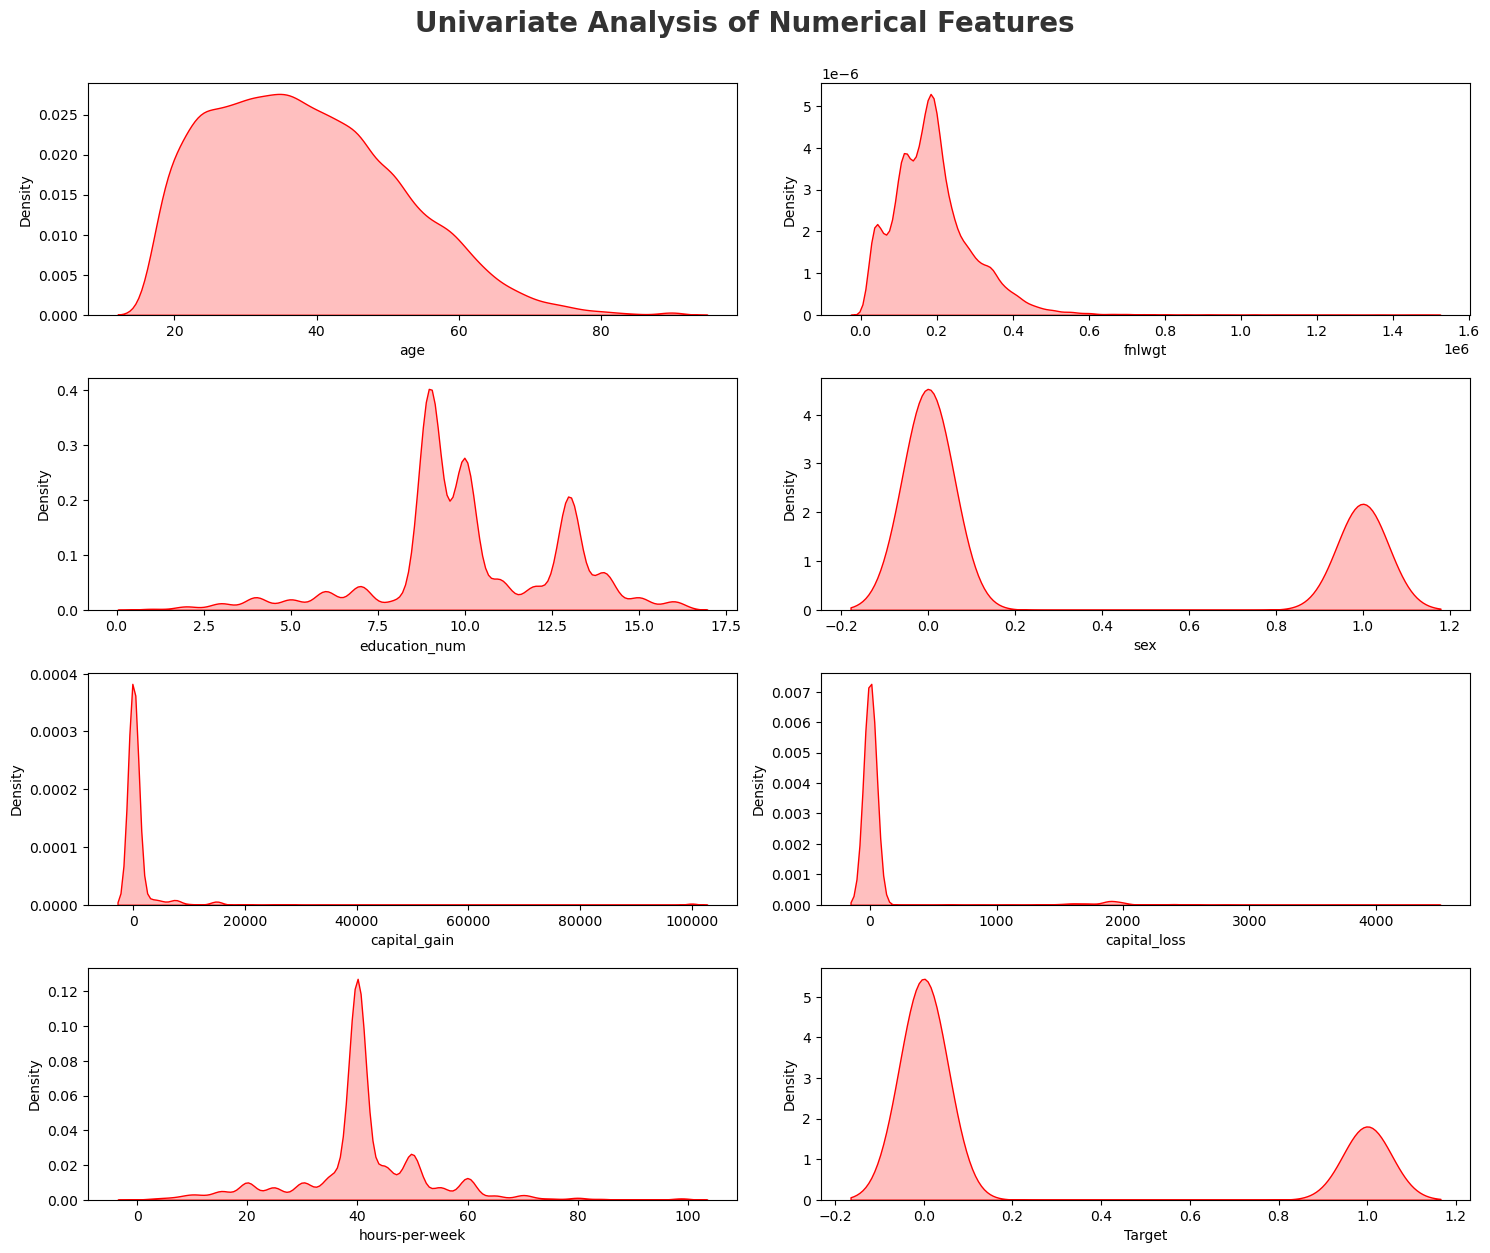

In [219]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(5, 2, i+1)
    sns.kdeplot(x=df[numeric_features[i]],shade=True, color='r')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

__Observations__<br>
age, fnlwgt, capital_gain, capital_loss are log normally distributed.

In [221]:
df.corr().T

,age,fnlwgt,education_num,sex,capital_gain,capital_loss,hours-per-week,Target
age,1.000000,-0.076279,0.043203,-0.081827,0.080162,0.060141,0.101348,0.242017
fnlwgt,-0.076279,1.000000,-0.045199,-0.025602,0.000420,-0.009755,-0.023033,-0.008992
education_num,0.043203,-0.045199,1.000000,-0.006049,0.124455,0.079613,0.152842,0.335413
sex,-0.081827,-0.025602,-0.006049,1.000000,-0.048819,-0.047008,-0.231126,-0.216668
capital_gain,0.080162,0.000420,0.124455,-0.048819,1.000000,-0.032255,0.080429,0.221204
capital_loss,0.060141,-0.009755,0.079613,-0.047008,-0.032255,1.000000,0.052380,0.150026
hours-per-week,0.101348,-0.023033,0.152842,-0.231126,0.080429,0.052380,1.000000,0.229435
Target,0.242017,-0.008992,0.335413,-0.216668,0.221204,0.150026,0.229435,1.000000


<AxesSubplot:>

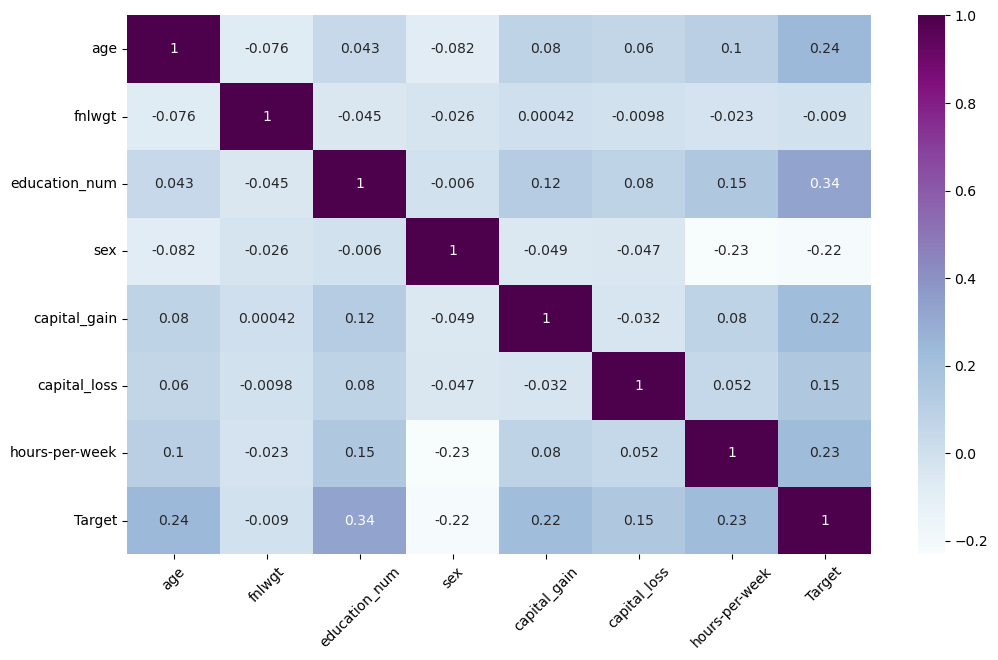

In [222]:
plt.figure(figsize=(12,7))
cor=df.corr()
plt.xticks(rotation=45)
plt.yticks(rotation=45,)
sns.heatmap(cor,cmap="BuPu",annot=True,)

__Obervations :-__<br>
There is no relation between features(Multi collinearity)

In [223]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours-per-week', 'native-country',
       'Target'],
      dtype='object')

In [224]:
numeric_features

['age',
 'fnlwgt',
 'education_num',
 'sex',
 'capital_gain',
 'capital_loss',
 'hours-per-week',
 'Target']

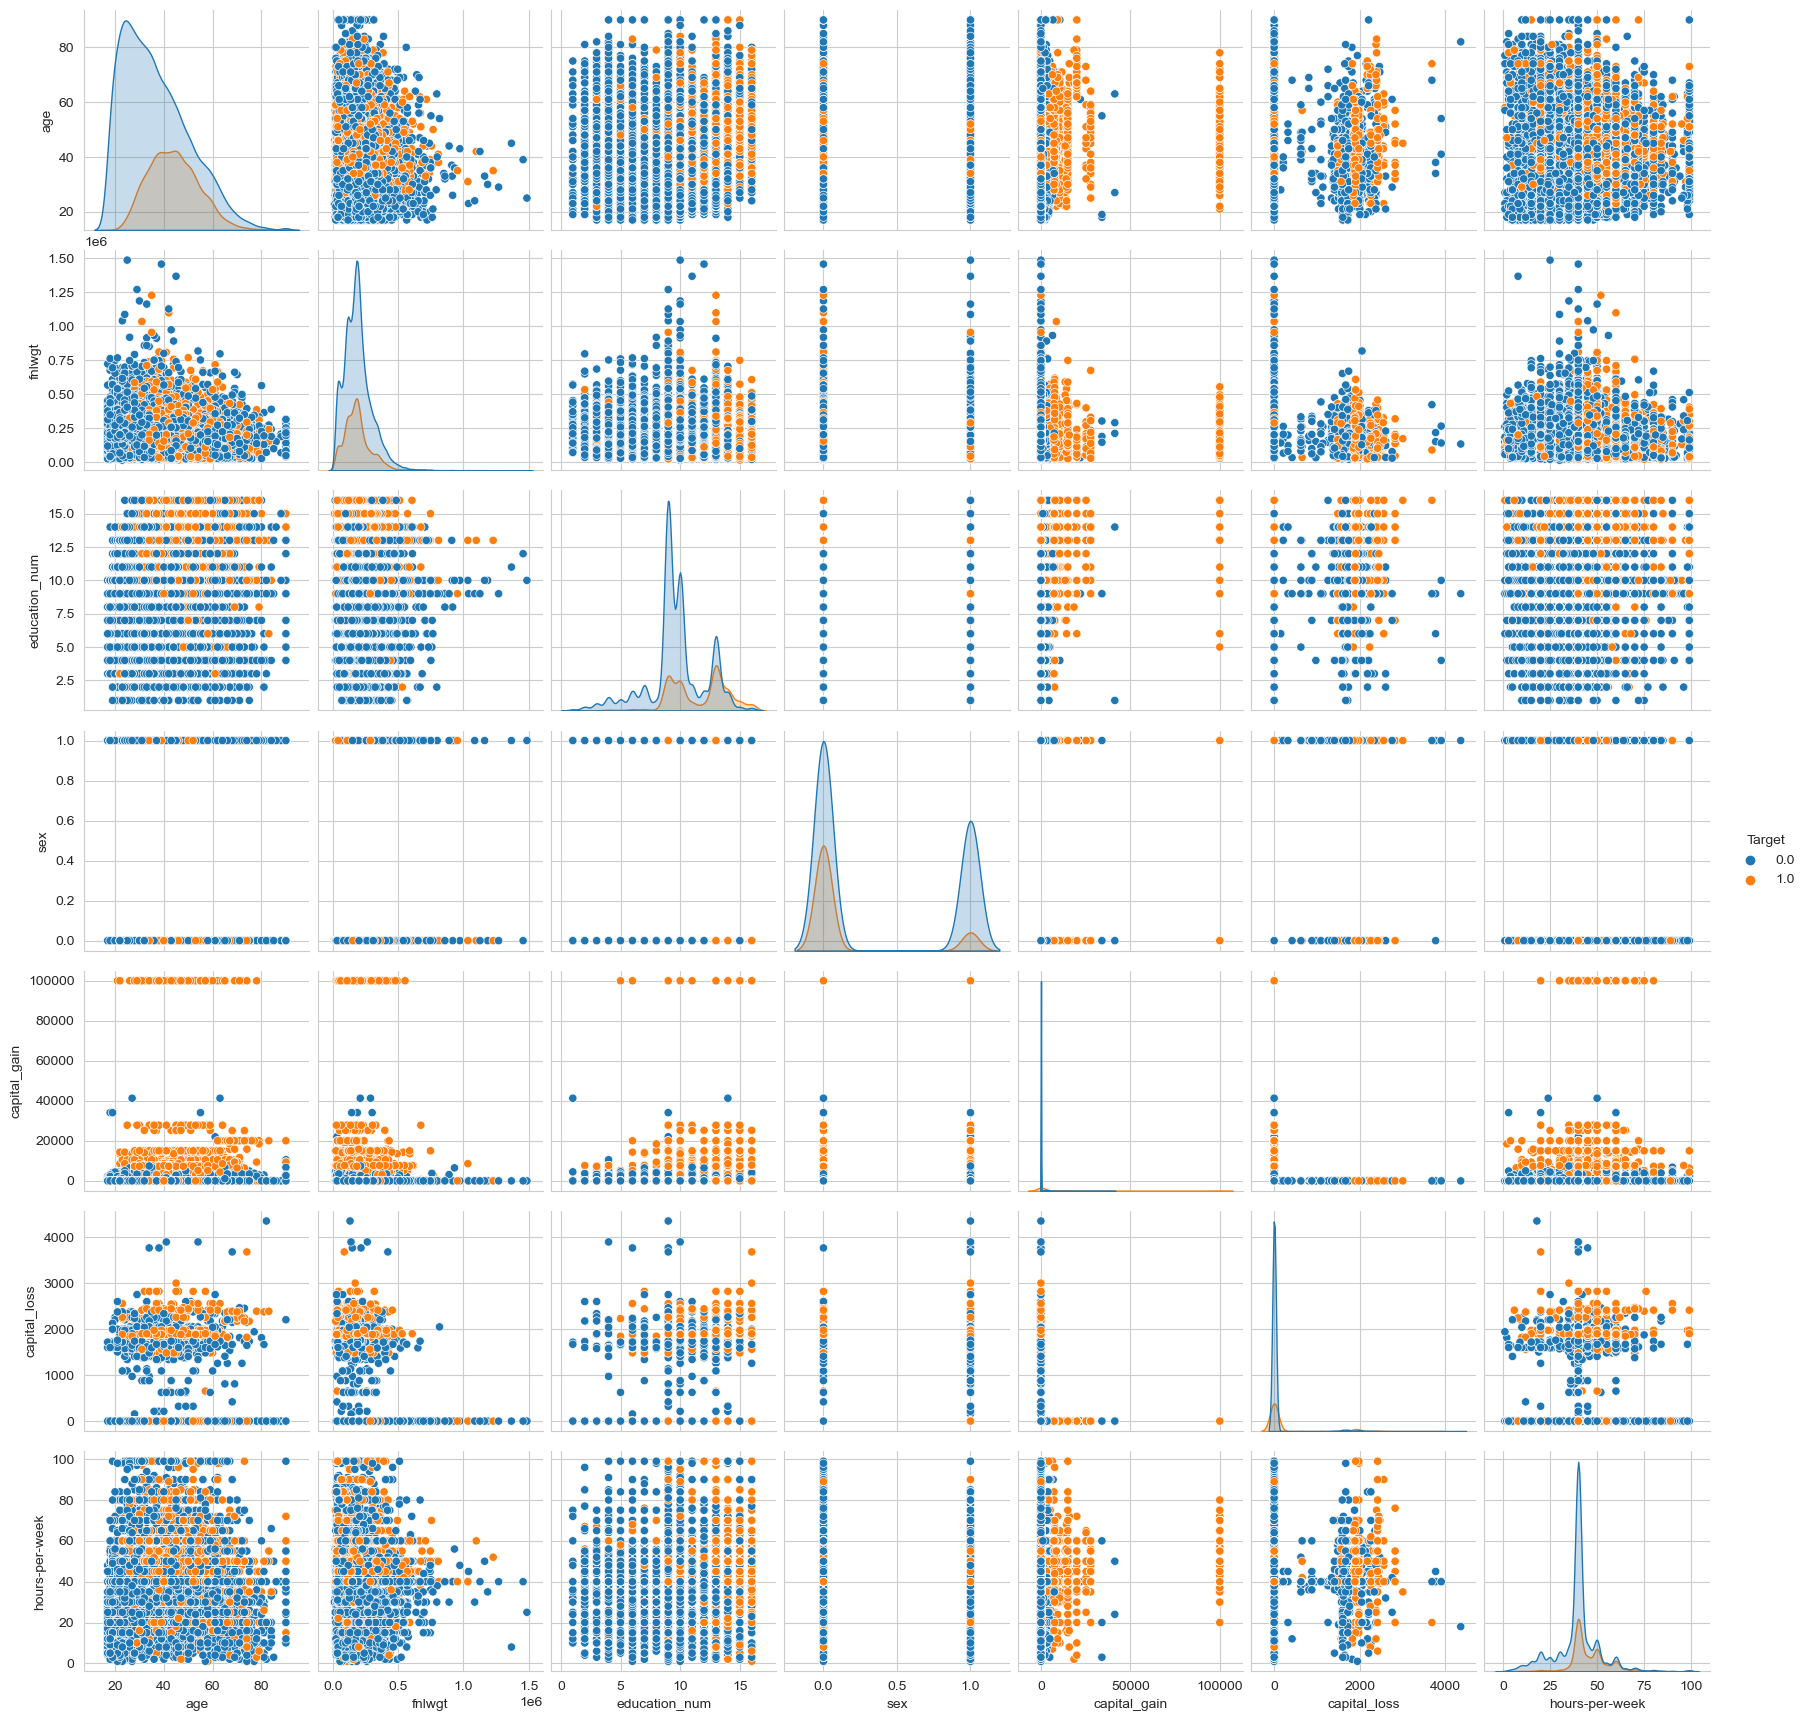

In [226]:
sns.set_style("whitegrid");

sns.pairplot(df,hue="Target");
plt.show()

## EDA for categorical Data

In [236]:
df[categorical_features].shape

(30139, 7)

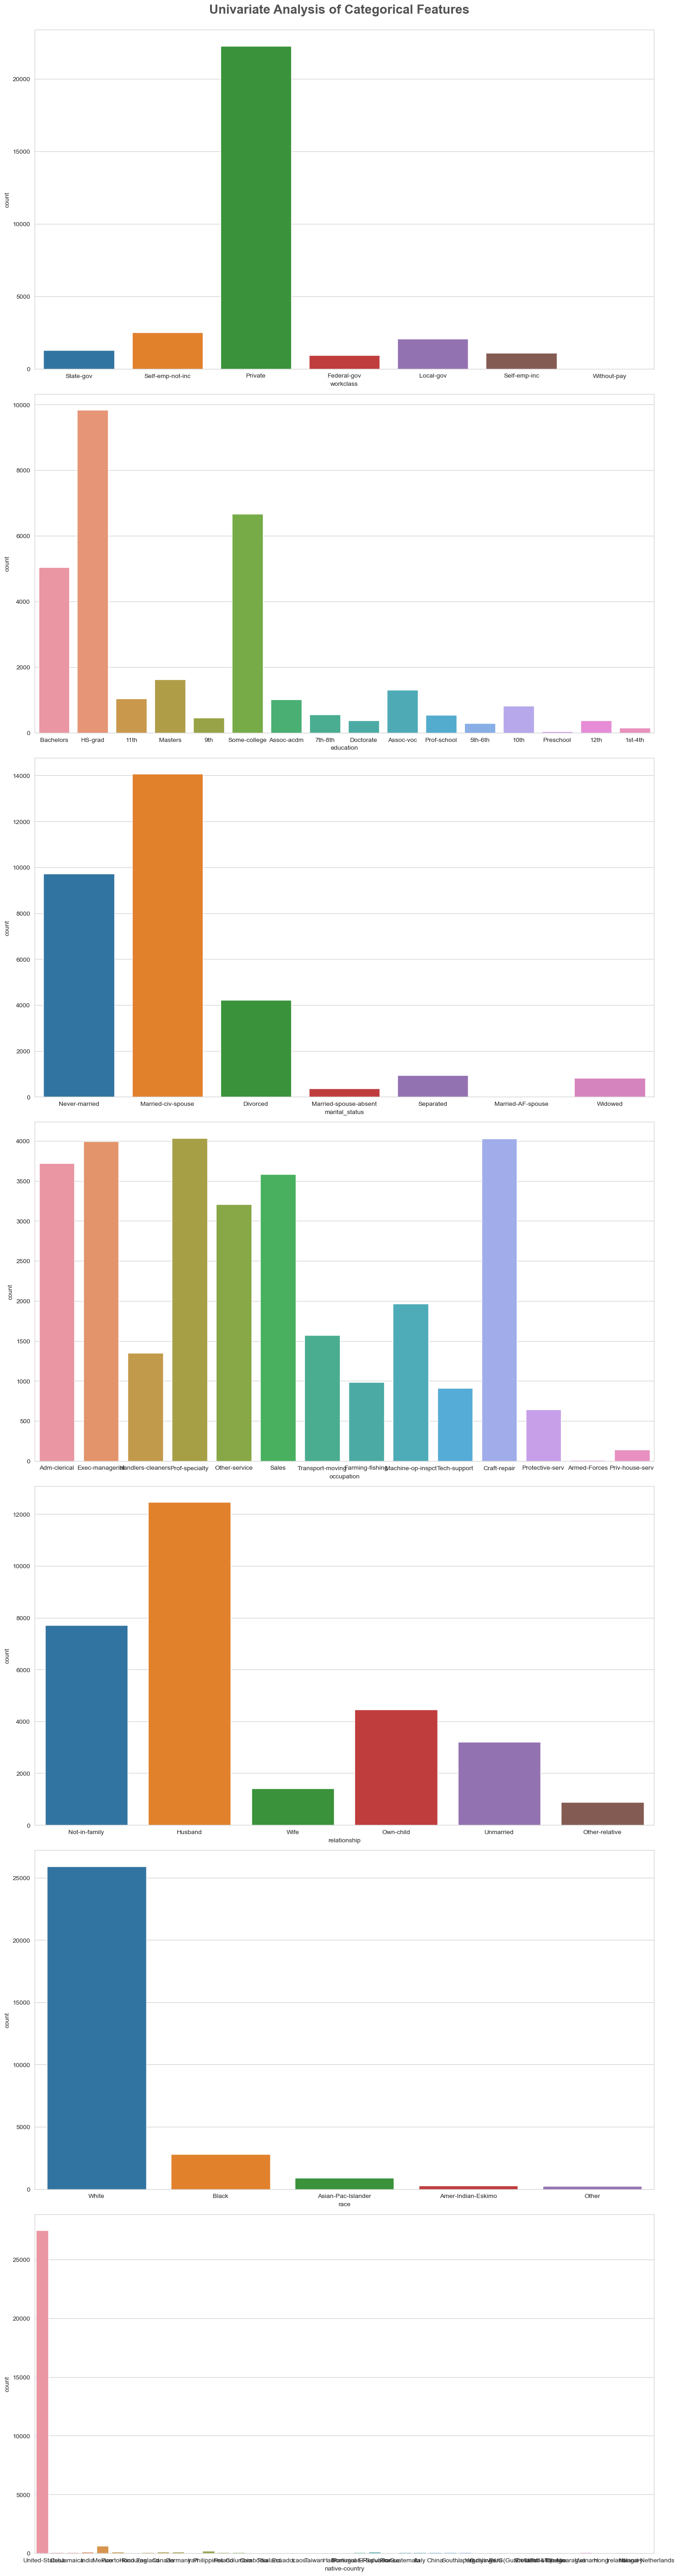

In [240]:
# categorical columns
plt.figure(figsize=(15,80))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
for i in range(len(categorical_features)):
    plt.subplot(10, 1, i+1)
    sns.countplot(x=df[categorical_features[i]])
    plt.xlabel(categorical_features[i])
    plt.tight_layout()

__Observations:__
- There is high cardinality in native country, occupation, education

## Checking for Outliers

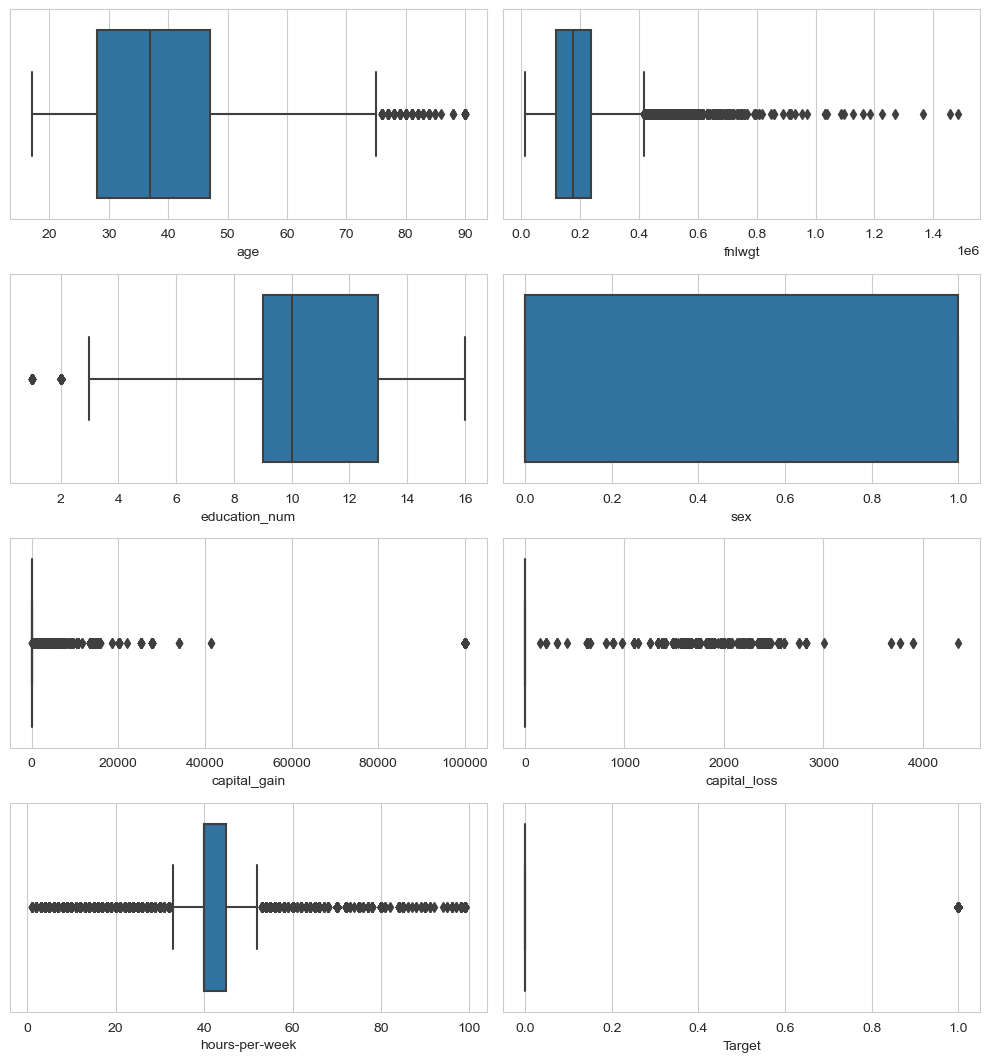

In [241]:
plt.figure(figsize=(10,50))
for i in range(len(numeric_features)):
    plt.subplot(19, 2, i+1)
    sns.boxplot(df[numeric_features[i]],)
    plt.tight_layout()

__Handeling the High Cardinality cateogeries__<br>
Taking cateogeries only which is contributing !% of the datatset size

In [258]:
for feature in categorical_features:
    temp=df.groupby(feature)["Target"].count()/len(df)
    temp_df=temp[temp>0.01].index
    df[feature]=np.where(df[feature].isin(temp),df[feature],"Rare_var")


In [259]:
df.head(10)

,age,workclass,fnlwgt,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours-per-week,native-country,Target
0,39.0,Rare_var,77516.0,13.0,Rare_var,Rare_var,Rare_var,Rare_var,0.0,2174.0,0.0,40.0,Rare_var,0.0
1,50.0,Rare_var,83311.0,13.0,Rare_var,Rare_var,Rare_var,Rare_var,0.0,0.0,0.0,13.0,Rare_var,0.0
2,38.0,Rare_var,215646.0,9.0,Rare_var,Rare_var,Rare_var,Rare_var,0.0,0.0,0.0,40.0,Rare_var,0.0
3,53.0,Rare_var,234721.0,7.0,Rare_var,Rare_var,Rare_var,Rare_var,0.0,0.0,0.0,40.0,Rare_var,0.0
4,28.0,Rare_var,338409.0,13.0,Rare_var,Rare_var,Rare_var,Rare_var,1.0,0.0,0.0,40.0,Rare_var,0.0
5,37.0,Rare_var,284582.0,14.0,Rare_var,Rare_var,Rare_var,Rare_var,1.0,0.0,0.0,40.0,Rare_var,0.0
6,49.0,Rare_var,160187.0,5.0,Rare_var,Rare_var,Rare_var,Rare_var,1.0,0.0,0.0,16.0,Rare_var,0.0
7,52.0,Rare_var,209642.0,9.0,Rare_var,Rare_var,Rare_var,Rare_var,0.0,0.0,0.0,45.0,Rare_var,1.0
8,31.0,Rare_var,45781.0,14.0,Rare_var,Rare_var,Rare_var,Rare_var,1.0,14084.0,0.0,50.0,Rare_var,1.0
9,42.0,Rare_var,159449.0,13.0,Rare_var,Rare_var,Rare_var,Rare_var,0.0,5178.0,0.0,40.0,Rare_var,1.0


In [260]:
labels_ordered=df.groupby(["race"])['Target'].mean().sort_values().index
labels_ordered

Index(['Rare_var'], dtype='object', name='race')

In [261]:
labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
labels_ordered

{'Rare_var': 0}

In [262]:
for feature in categorical_features:
    labels_ordered=df.groupby([feature])['Target'].mean().to_dict()
    df[feature]=df[feature].map(labels_ordered)

In [263]:
df.head(10)


,age,workclass,fnlwgt,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours-per-week,native-country,Target
0,39.0,0.249046,77516.0,13.0,0.249046,0.249046,0.249046,0.249046,0.0,2174.0,0.0,40.0,0.249046,0.0
1,50.0,0.249046,83311.0,13.0,0.249046,0.249046,0.249046,0.249046,0.0,0.0,0.0,13.0,0.249046,0.0
2,38.0,0.249046,215646.0,9.0,0.249046,0.249046,0.249046,0.249046,0.0,0.0,0.0,40.0,0.249046,0.0
3,53.0,0.249046,234721.0,7.0,0.249046,0.249046,0.249046,0.249046,0.0,0.0,0.0,40.0,0.249046,0.0
4,28.0,0.249046,338409.0,13.0,0.249046,0.249046,0.249046,0.249046,1.0,0.0,0.0,40.0,0.249046,0.0
5,37.0,0.249046,284582.0,14.0,0.249046,0.249046,0.249046,0.249046,1.0,0.0,0.0,40.0,0.249046,0.0
6,49.0,0.249046,160187.0,5.0,0.249046,0.249046,0.249046,0.249046,1.0,0.0,0.0,16.0,0.249046,0.0
7,52.0,0.249046,209642.0,9.0,0.249046,0.249046,0.249046,0.249046,0.0,0.0,0.0,45.0,0.249046,1.0
8,31.0,0.249046,45781.0,14.0,0.249046,0.249046,0.249046,0.249046,1.0,14084.0,0.0,50.0,0.249046,1.0
9,42.0,0.249046,159449.0,13.0,0.249046,0.249046,0.249046,0.249046,0.0,5178.0,0.0,40.0,0.249046,1.0


In [264]:
df.dtypes


age               float64
workclass         float64
fnlwgt            float64
education_num     float64
marital_status    float64
occupation        float64
relationship      float64
race              float64
sex               float64
capital_gain      float64
capital_loss      float64
hours-per-week    float64
native-country    float64
Target            float64
dtype: object

__Handeling the High Cardinality cateogeries__<br>
Taking cateogeries only which is contributing !% of the datatset size

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, '9.0'),
  Text(1, 0, '10.0'),
  Text(2, 0, '13.0'),
  Text(3, 0, '14.0'),
  Text(4, 0, '11.0'),
  Text(5, 0, '7.0'),
  Text(6, 0, '12.0'),
  Text(7, 0, '6.0'),
  Text(8, 0, '4.0'),
  Text(9, 0, '15.0'),
  Text(10, 0, '5.0'),
  Text(11, 0, '8.0'),
  Text(12, 0, '16.0'),
  Text(13, 0, '3.0'),
  Text(14, 0, '2.0'),
  Text(15, 0, '1.0')])

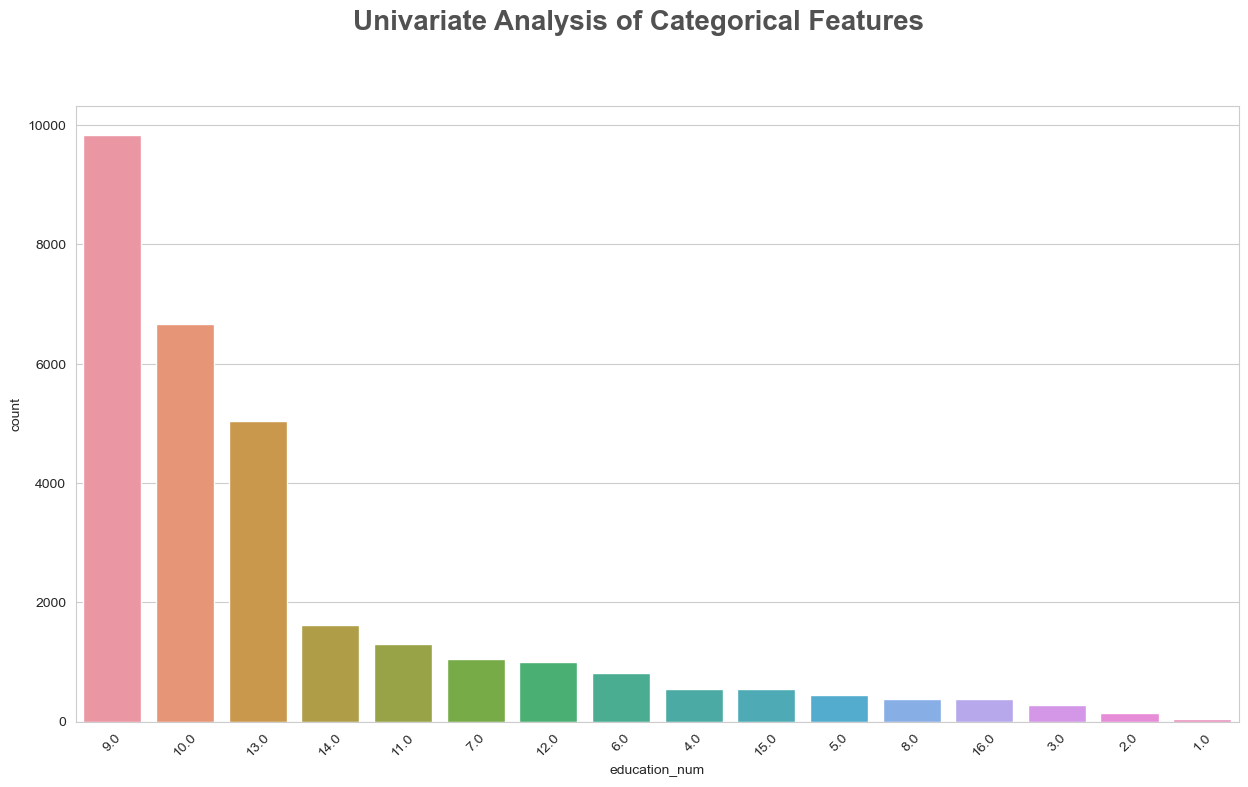

In [248]:
plt.figure(figsize=(15,8))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
sns.countplot(x=df['education_num'],order=df["education_num"].value_counts().index)
plt.xlabel("education_num")
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'HS-grad'),
  Text(1, 0, 'Some-college'),
  Text(2, 0, 'Bachelors'),
  Text(3, 0, 'Masters'),
  Text(4, 0, 'Assoc-voc'),
  Text(5, 0, '11th'),
  Text(6, 0, 'Assoc-acdm'),
  Text(7, 0, '10th'),
  Text(8, 0, '7th-8th'),
  Text(9, 0, 'Prof-school'),
  Text(10, 0, '9th'),
  Text(11, 0, '12th'),
  Text(12, 0, 'Doctorate'),
  Text(13, 0, '5th-6th'),
  Text(14, 0, '1st-4th'),
  Text(15, 0, 'Preschool')])

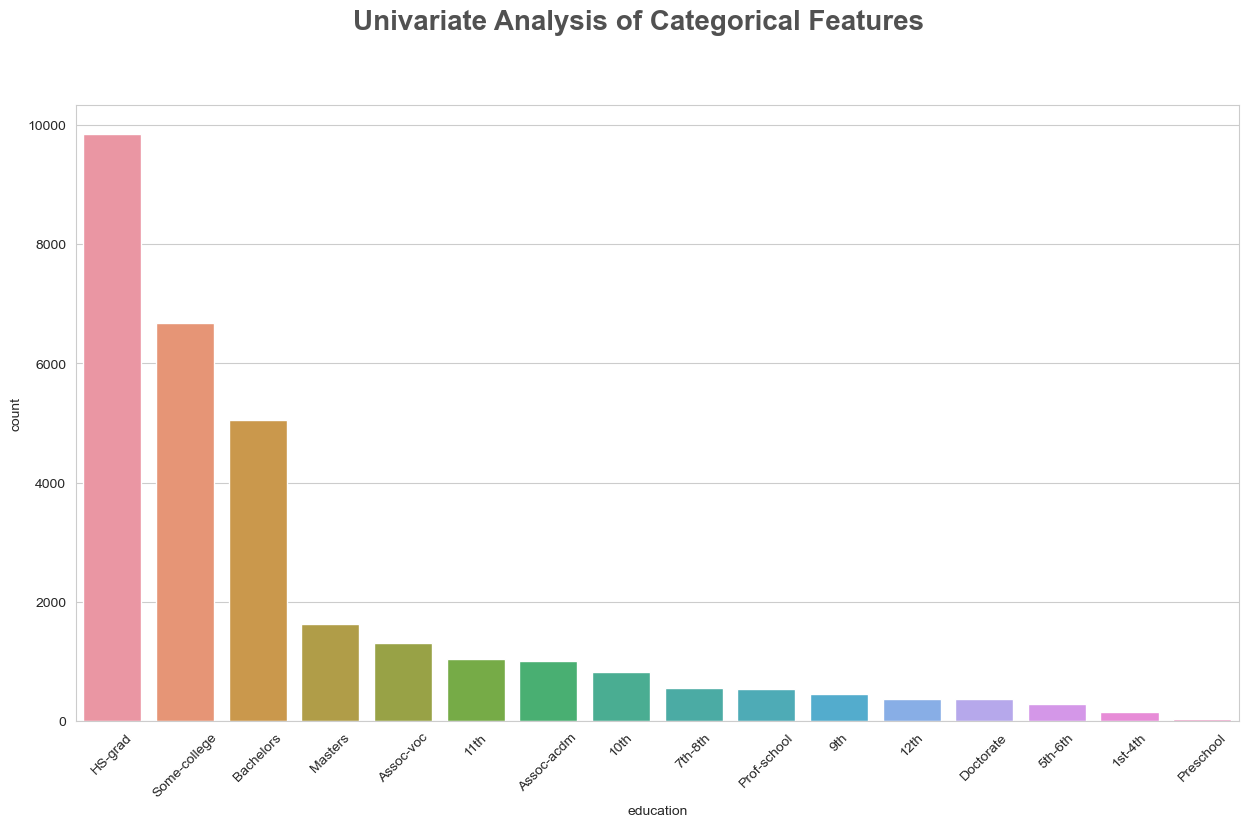

In [250]:
plt.figure(figsize=(15,8))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
sns.countplot(x=df['education'],order=df["education"].value_counts().index)
plt.xlabel("education")
plt.xticks(rotation=45)

In [251]:
df.education.unique()


array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', '7th-8th', 'Doctorate', 'Assoc-voc', 'Prof-school',
       '5th-6th', '10th', 'Preschool', '12th', '1st-4th'], dtype=object)

In [252]:
edu_df=pd.DataFrame({"Education_number":df["education_num"].value_counts()})
edu_df['Education']=df.education.unique()


In [253]:
edu_df.rename({"Education_number":"Count"},axis=1,inplace=True)
edu_df

,Count,Education
9.0,9834,Bachelors
10.0,6669,HS-grad
13.0,5042,11th
14.0,1626,Masters
11.0,1307,9th
7.0,1048,Some-college
12.0,1008,Assoc-acdm
6.0,820,7th-8th
4.0,556,Doctorate
15.0,542,Assoc-voc


In [254]:
df.drop("education",axis=1,inplace=True)
df

,age,workclass,fnlwgt,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours-per-week,native-country,Target
0,39.0,State-gov,77516.0,13.0,Never-married,Adm-clerical,Not-in-family,White,0.0,2174.0,0.0,40.0,United-States,0.0
1,50.0,Self-emp-not-inc,83311.0,13.0,Married-civ-spouse,Exec-managerial,Husband,White,0.0,0.0,0.0,13.0,United-States,0.0
2,38.0,Private,215646.0,9.0,Divorced,Handlers-cleaners,Not-in-family,White,0.0,0.0,0.0,40.0,United-States,0.0
3,53.0,Private,234721.0,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,0.0,0.0,0.0,40.0,United-States,0.0
4,28.0,Private,338409.0,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,1.0,0.0,0.0,40.0,Cuba,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27.0,Private,257302.0,12.0,Married-civ-spouse,Tech-support,Wife,White,1.0,0.0,0.0,38.0,United-States,0.0
32557,40.0,Private,154374.0,9.0,Married-civ-spouse,Machine-op-inspct,Husband,White,0.0,0.0,0.0,40.0,United-States,1.0
32558,58.0,Private,151910.0,9.0,Widowed,Adm-clerical,Unmarried,White,1.0,0.0,0.0,40.0,United-States,0.0
32559,22.0,Private,201490.0,9.0,Never-married,Adm-clerical,Own-child,White,0.0,0.0,0.0,20.0,United-States,0.0


In [255]:
categorical_features.remove("education")

In [256]:
categorical_features

['workclass',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'native-country']

In [229]:
## Data is imbalance 
zero=df["Target"].value_counts()[0]
one=df["Target"].value_counts()[1]

In [230]:
zero

22633

In [232]:
len(df)

30139

In [231]:

print("Percentage of 0 in dataset is ",zero/len(df)*100)
print("Percentage of 1 in dataset is ",one/len(df)*100)

Percentage of 0 in dataset is  75.09539135339594
Percentage of 1 in dataset is  24.904608646604068


<AxesSubplot:xlabel='Target', ylabel='count'>

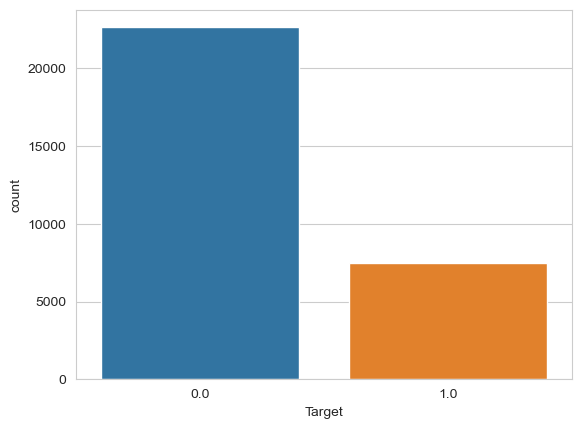

In [234]:
sns.countplot(x=df["Target"])